#K-Nearest Neighbors (KNN) Algorithm Tutorial - Machine Learning Basics

* Tutorial: https://news.towardsai.net/knn
* Github: https://github.com/towardsai/tutorials/tree/master/k-nearest-neighbors

https://scikit-learn.org/stable/supervised_learning.html

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [82]:
# Import the iris dataset as provided by the sklearn Python module
from sklearn.datasets import load_iris
iris = load_iris()



In [83]:
# Converting sklearn data into Pandas dataframe
# target variables imply
# 0.0 - Setosa
# 1.0 - Versicolor
# 2.0 - Virginica
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [84]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


## Checking for outliers and imbalanced data

<AxesSubplot:xlabel='target', ylabel='count'>

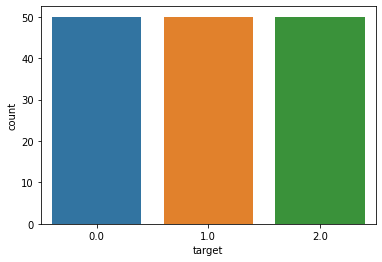

In [85]:
# data is perfectly balanced
sns.countplot(x='target', data=iris)

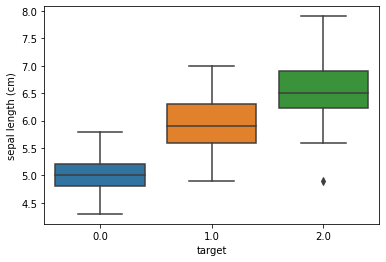

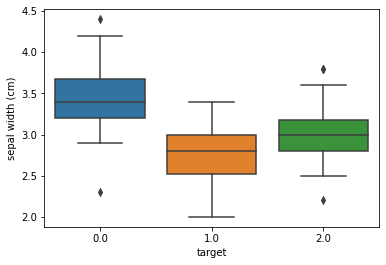

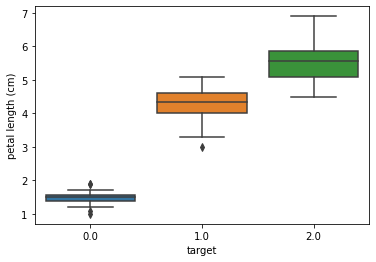

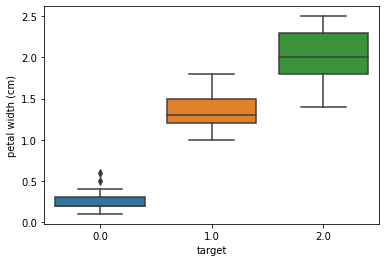

In [86]:
# not much of outliers to br handled
for feature in ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']:
  sns.boxplot(x='target', y=feature, data=iris)
  plt.show()

## Plotting a 2-D graph

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

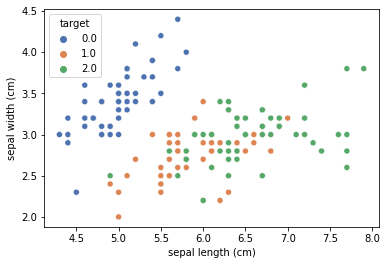

In [87]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=iris, hue='target', palette="deep")

## Separating features and target

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.02-samples-features.png?raw=1)
[figure source in Appendix](06.00-Figure-Code.ipynb#Features-and-Labels-Grid)

In [88]:
# X variable contains flower features
# Y variable contains target values
X = iris.drop(['target'], axis=1)
y = iris['target']

In [89]:
X.shape

(150, 4)

In [90]:
y.shape

(150,)

In [91]:
X[0:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [92]:
y[0:3]

0    0.0
1    0.0
2    0.0
Name: target, dtype: float64

## Split the dataset into train and test sets

In [93]:
# 60% of the data will be randomly selected at training data
# remaining 40% as testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [94]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [95]:
X_test.shape, y_test.shape

((60, 4), (60,))

## Initial model

In [96]:
# Initial model with nearest neighbor as 1(k-value)
# further, k will be replaced with optimal value
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [97]:
#predicting output for test data
pred = knn.predict(X_test)

In [98]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
40,5.0,3.5,1.3,0.3
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3


In [99]:
pred

array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 2., 1., 0., 0., 2., 0., 0., 1., 1., 0., 2., 1., 0., 2.,
       2., 1., 0., 2., 1., 1., 2., 0., 2., 0., 0., 1., 2., 2., 1., 2., 1.,
       2., 1., 1., 1., 1., 1., 2., 1., 2.])

In [100]:
print(knn.score(X_test, y_test))

0.9166666666666666


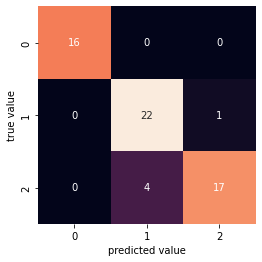

In [101]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, pred)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

## Finding the right k-value

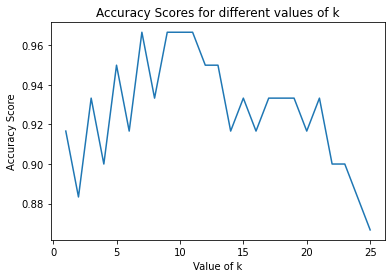

In [102]:
# checking accuracy score for k-value rangin from 1 to 26
k_range = list(range(1,26))
scores = []

# model fitting and calculating accuracy score
# for each k-value in the range 1-26
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k')
plt.show()

## Accuracy for optimal k-value

In [103]:
# 11 is the optimal k-value for this dataset
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9666666666666667


# GaussianNB

In [104]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(X_train, y_train)                  # 3. fit model to data




GaussianNB()

In [105]:
pred = model.predict(X_test)

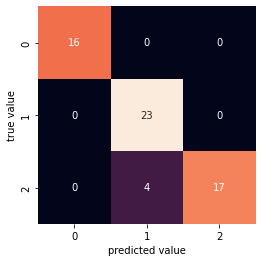

In [106]:
mat = confusion_matrix(y_test, pred)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [107]:
print(model.score(X_test, y_test))

0.9333333333333333


# RandomForestClassifier

In [108]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
model = model.fit(X_train, y_train) 

print(model.score(X_test, y_test))

0.9


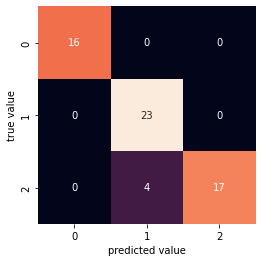

In [109]:
mat = confusion_matrix(y_test, pred)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

# SVM

In [110]:
#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC

#training SVM model with linear kernel
model = SVC(kernel='linear',random_state = 10)
model.fit(X_train, y_train)

#predicting output for test data
pred = model.predict(X_test)

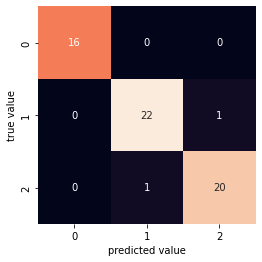

In [111]:
mat = confusion_matrix(y_test, pred)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

# Decision Trees

In [112]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)

#predicting output for test data
pred = model.predict(X_test)

print(model.score(X_test, y_test))

0.95


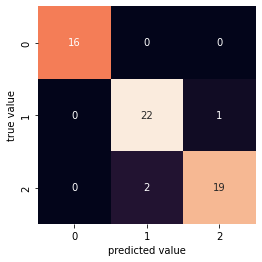

In [113]:
mat = confusion_matrix(y_test, pred)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');